<a href="https://colab.research.google.com/github/prp20/PytorchLearning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install torch

In [35]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'x')

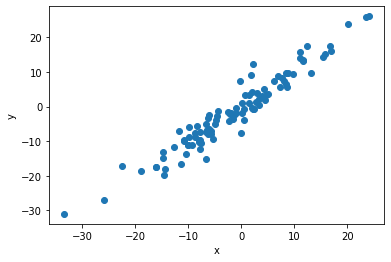

In [45]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [37]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [38]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [39]:
[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [40]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

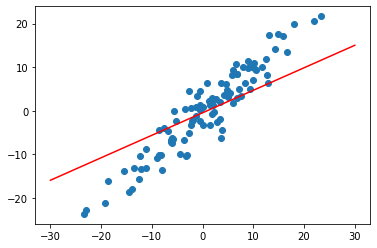

In [41]:
plot_fit('Initial Model')

In [42]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [43]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 28.914575576782227
epoch: 1 loss: 20.61296844482422
epoch: 2 loss: 15.965326309204102
epoch: 3 loss: 13.363329887390137
epoch: 4 loss: 11.906599044799805
epoch: 5 loss: 11.091031074523926
epoch: 6 loss: 10.634418487548828
epoch: 7 loss: 10.378766059875488
epoch: 8 loss: 10.235618591308594
epoch: 9 loss: 10.155462265014648
epoch: 10 loss: 10.110568046569824
epoch: 11 loss: 10.085415840148926
epoch: 12 loss: 10.071319580078125
epoch: 13 loss: 10.063411712646484
epoch: 14 loss: 10.058968544006348
epoch: 15 loss: 10.056467056274414
epoch: 16 loss: 10.055052757263184
epoch: 17 loss: 10.054245948791504
epoch: 18 loss: 10.053781509399414
epoch: 19 loss: 10.053510665893555
epoch: 20 loss: 10.053346633911133
epoch: 21 loss: 10.053242683410645
epoch: 22 loss: 10.053173065185547
epoch: 23 loss: 10.05312442779541
epoch: 24 loss: 10.05308723449707
epoch: 25 loss: 10.053055763244629
epoch: 26 loss: 10.05302906036377
epoch: 27 loss: 10.053004264831543
epoch: 28 loss: 10.052982330322266

Text(0.5, 0, 'epoch')

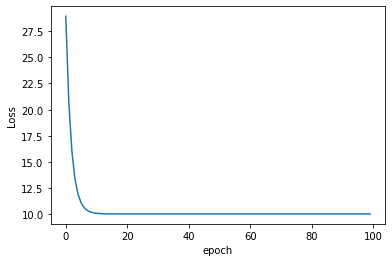

In [46]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

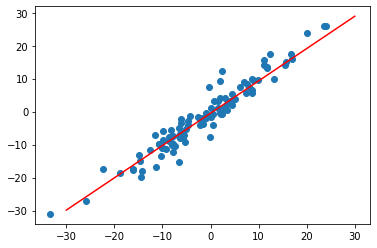

In [47]:
plot_fit("Trained Model")